# Plot Specified Station(s)

Original image replaced with resized image at: /mnt/hypo_data/mab419/cybershake_investigation/usages/plots/selected_stations_map.png


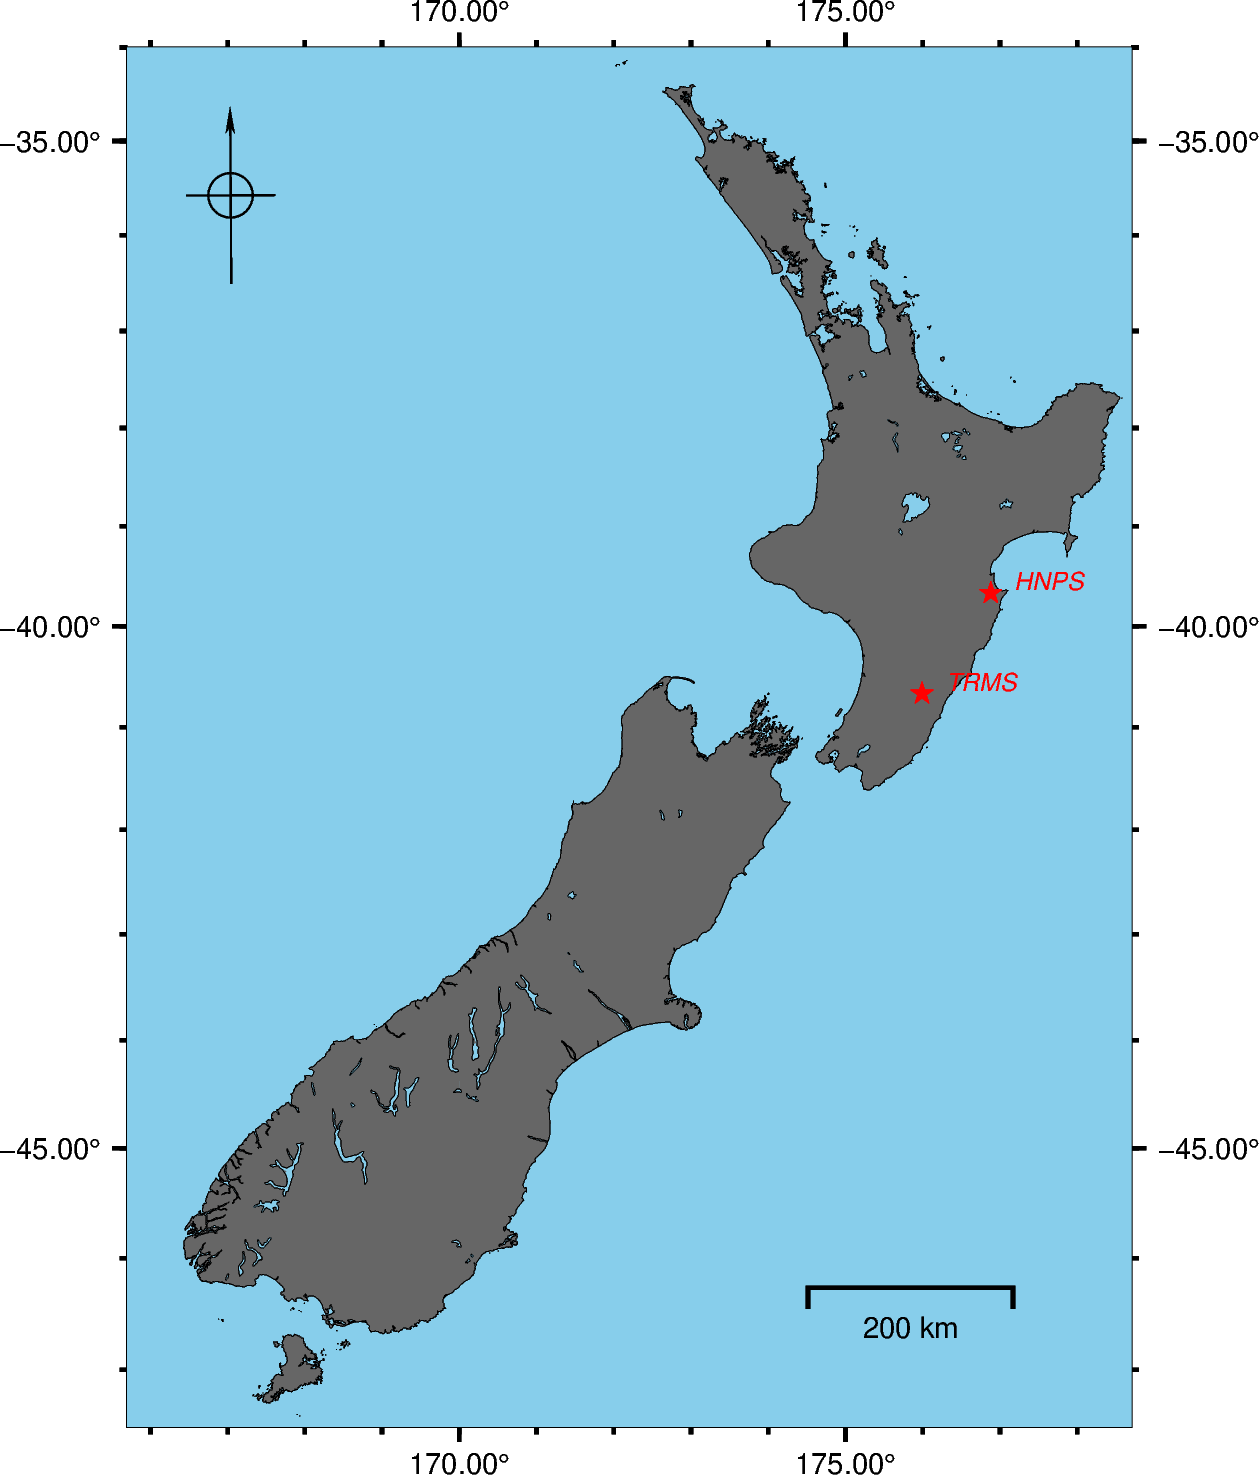

In [1]:
import os
from pathlib import Path
import importlib

file_dir = os.getcwd()
root_dir = os.path.dirname(file_dir)
plots_saving_dir = file_dir + "/plots"
os.makedirs(plots_saving_dir, exist_ok=True)
os.chdir(root_dir)

import utils.util as util

importlib.reload(util)
from utils.util import plot_specific_stations

# List of stations to plot
st_list = ["HNPS", "TRMS"]

# Call the function to generate a map
fig, st_df = plot_specific_stations(
    st_list=st_list,
    desired_width_cm=8.5,
    intended_dpi=900,
    file_name="selected_stations_map.png",
    plots_saving_dir=Path(plots_saving_dir),
    plot_using_mapdata=False,
)

# Plot All Station(s)

file_dir /mnt/hypo_data/mab419/mab419_cybershake_investigation/usages
root_dir /mnt/hypo_data/mab419/mab419_cybershake_investigation
Original image replaced with resized image at: /mnt/hypo_data/mab419/mab419_cybershake_investigation/usages/plots/stations_map_all.png


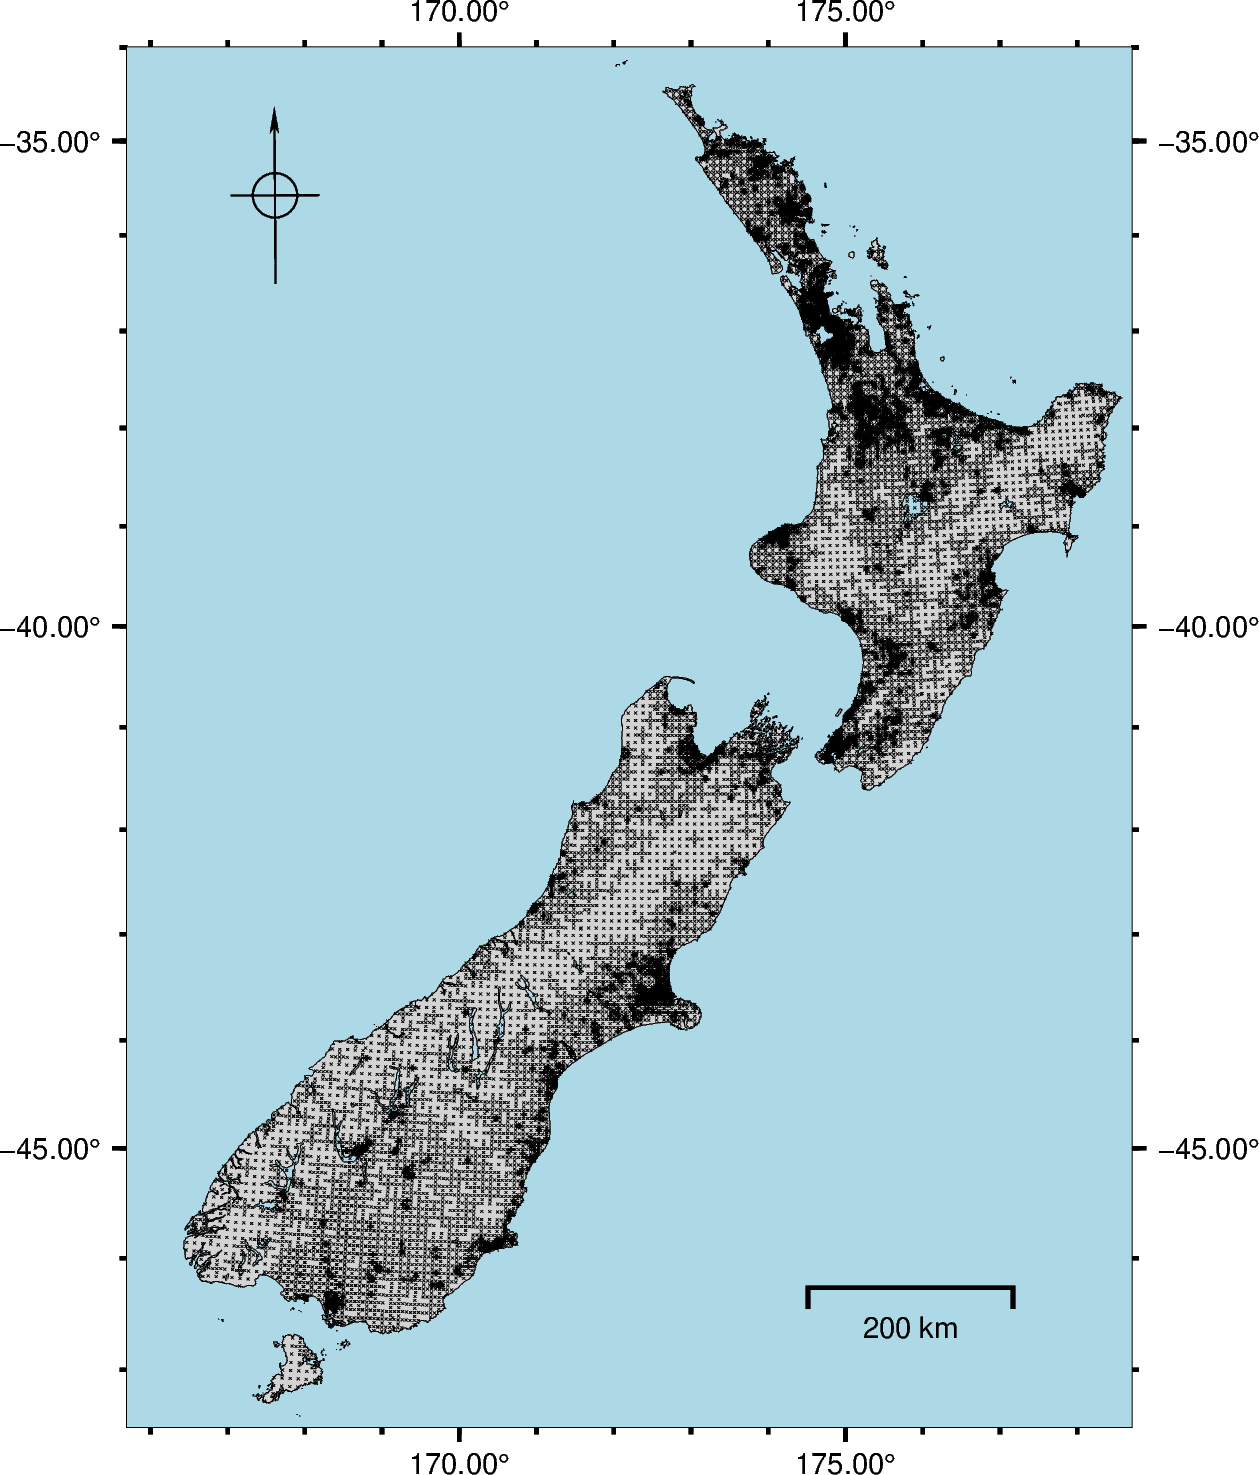

In [1]:
# Importing the dependencies
import os
import sys
from pathlib import Path
import importlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# changing working directory to recognize modules
# # .py
# file_dir = Path(__file__).resolve().parent
# root_dir = file_dir.parent
# .ipynb
file_dir = os.getcwd()
root_dir = os.path.dirname(file_dir)
os.chdir(root_dir)
print(f"file_dir {file_dir}")
print(f"root_dir {root_dir}")

if str(root_dir) not in sys.path:
    sys.path.append(str(root_dir))

import utils.util as util
importlib.reload(util)
import utils.mapping_util as mapping_util
importlib.reload(mapping_util)


from utils.util import get_station_data
from utils.util import plot_specific_stations
from pygmt_helper.pygmt_helper import plots
from pygmt_helper.pygmt_helper import plotting

# define pathes
base_dir = root_dir + "/base_data"
plots_saving_dir = root_dir + "/usages/plots"
os.makedirs(plots_saving_dir, exist_ok=True)
stations_ll = "non_uniform_whole_nz_with_real_stations-hh400_v20p3_land.ll"
stations_vs30 = "non_uniform_whole_nz_with_real_stations-hh400_v20p3_land.vs30"
stations_z = "non_uniform_whole_nz_with_real_stations-hh400_v20p3_land.z"

# loading station data
stations_df = get_station_data(
    os.path.join(base_dir, stations_ll),
    os.path.join(base_dir, stations_vs30),
    os.path.join(base_dir, stations_z),
)

# plot all stations
plot_using_mapdata = False

if plot_using_mapdata == True:
    # loading the mapdata
    map_data_ffp = Path(
        "/mnt/hypo_data/mab419/mab419_cybershake_investigation/qcore/data"
    )
    map_data = (
        plotting.NZMapData.load(map_data_ffp) if map_data_ffp is not None else None
    )
else:
    map_data = None


fig = plotting.gen_region_fig(
    region=(165.7, 178.7, -47.5, -34),
    projection="M8.5c",
    map_data=map_data,
    plot_roads=False,
    plot_highways=False,
    plot_topo=True,
    config_options=dict(
        MAP_FRAME_TYPE="graph",
        FORMAT_GEO_MAP="ddd.xx",
        MAP_GRID_PEN="0.5p,gray",
        MAP_TICK_PEN_PRIMARY="1p,black",
        MAP_FRAME_PEN="thinner,black",
        MAP_FRAME_AXES="WSEN",
        FONT_ANNOT_PRIMARY="7p,Helvetica,black",
        FONT_LABEL="7p",  # Font size for axis labels
        FONT_TITLE="9p",  # Font size for the title
    ),
)

fig.plot(
    x=stations_df.long.values.astype(float),
    y=stations_df.lat.values.astype(float),
    style="x0.03c",
    fill="black",
    pen="0.05p,black",
)
fig.basemap(map_scale="jBR+w200k+o1c/1c", rose="jTL+w1.5c+o0.5c/0.5c")

saving_path = Path(os.path.join(plots_saving_dir, "stations_map_all.png"))

if saving_path.exists():
    saving_path.unlink()

fig.savefig(saving_path, dpi=1200)
util.resize_image_to_width(
    image_path=saving_path, desired_width_cm=8, dpi=900, replace=True
)

fig.show()